In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
import pickle
%matplotlib inline

In [0]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D , Dense, Dropout, Flatten
from keras.optimizers import Adam

In [0]:
import cv2
import pandas as pd

In [101]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [102]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [104]:
data.head(43)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ClassId   43 non-null     int64 
 1   SignName  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f) 

with open('german-traffic-signs/valid.p', 'rb') as f:
  valid_data = pickle.load(f) 

with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f) 

In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [108]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
(34799,)
(4410,)
(12630,)


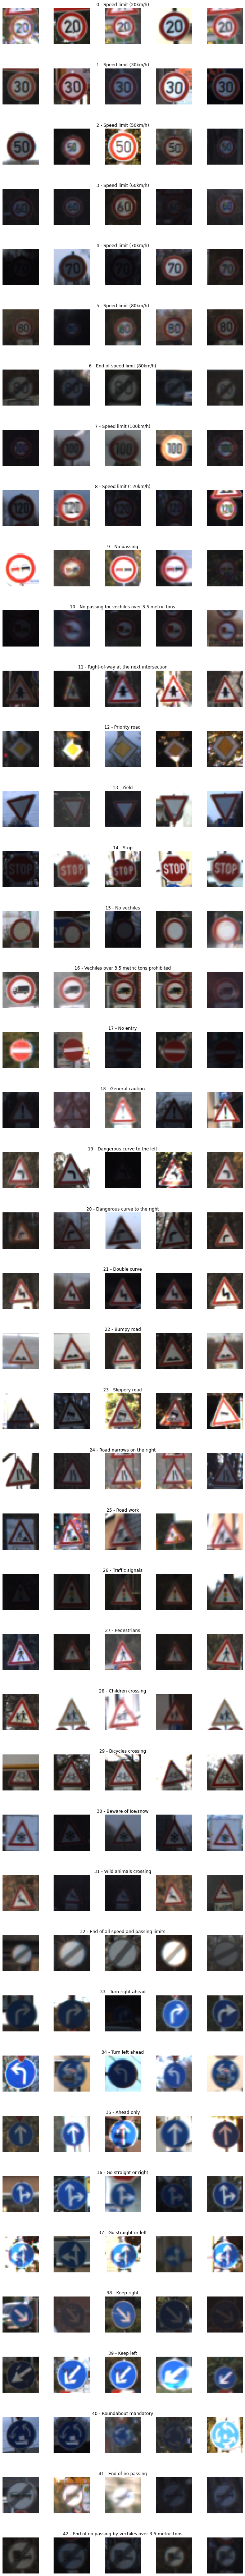

In [109]:
nrows = 43
ncols = 5
l = []
fig,axs = plt.subplots(nrows = nrows,ncols = ncols,figsize = (10,100))
fig.tight_layout()

for i in range(nrows):
  X_selected = X_train[y_train == i]
  label = data['SignName'][i]
  l.append(len(X_selected))
  for j in range(ncols):
    axs[i][j].imshow(X_selected[random.randint(0,len(X_selected) - 1),:,:],cmap = plt.get_cmap('gray'))
    axs[i][j].axis('off')
    if j == 2:
      axs[i][j].set_title(str(i)+' - '+ label ) 

Text(0.5, 1.0, 'Distribution')

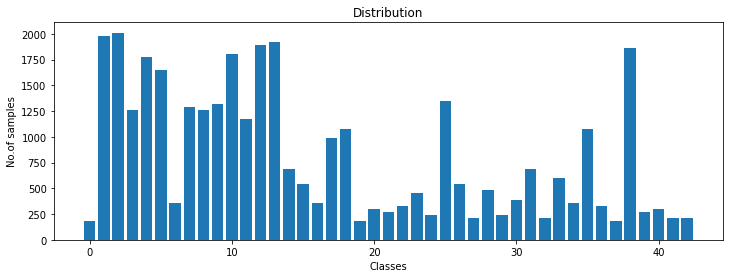

In [110]:
plt.figure(figsize = (12,4))
plt.bar(range(0,43),l)
plt.xlabel('Classes')
plt.ylabel('No.of samples')
plt.title('Distribution')

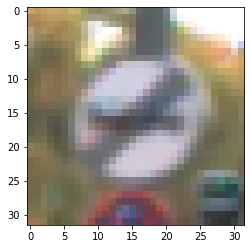

In [111]:
plt.imshow(X_train[100])

In [112]:
print(y_train[100])

41


In [113]:
print(X_train[100].shape)

(32, 32, 3)


In [0]:
def to_grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

In [0]:
img = to_grayscale(X_train[100])

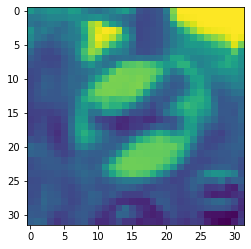

In [116]:
plt.imshow(img)

In [0]:
def to_equalise(img):
  img = cv2.equalizeHist(img)
  return img

img = to_equalise(img)

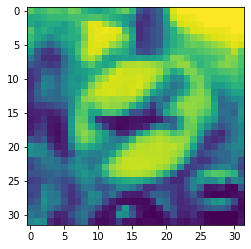

In [118]:
plt.imshow(img)

In [119]:
img.shape

(32, 32)

In [0]:
def preprocess(img):
  img = to_grayscale(img)
  img = to_equalise(img)
  img = img/255.0
  return img

In [0]:
X_train = np.array(list(map(preprocess,X_train)))
X_val = np.array(list(map(preprocess,X_val)))
X_test = np.array(list(map(preprocess,X_test)))

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [123]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)
y_test = to_categorical(y_test,43)


In [126]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(34799, 43)
(4410, 43)
(12630, 43)


In [0]:
def model1():
  model = Sequential()
  model.add(Conv2D(30,(5,5),activation = 'relu',input_shape = (32,32,1)))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(15,(3,3),activation = 'relu'))
  model.add(MaxPool2D((2,2)))

  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dense(43, activation = 'softmax'))
  model.compile(Adam(0.1),metrics = ['accuracy'],loss = 'categorical_crossentropy')
  return model


In [0]:
model1 = model1()

In [129]:
model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               270500    
_________________________________________________________________
dense_6 (Dense)              (None, 43)               

In [130]:
h = model1.fit(X_train,y_train,validation_data = [X_val,y_val], batch_size = 400, epochs = 10,shuffle = True,verbose =1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 26s 752us/step - loss: 29.6075 - accuracy: 0.0539 - val_loss: 3.5599 - val_accuracy: 0.0476
Epoch 2/10
34799/34799 [==============================] - 26s 741us/step - loss: 3.4836 - accuracy: 0.0559 - val_loss: 3.5583 - val_accuracy: 0.0544
Epoch 3/10
34799/34799 [==============================] - 26s 742us/step - loss: 3.4841 - accuracy: 0.0548 - val_loss: 3.5604 - val_accuracy: 0.0544
Epoch 4/10
34799/34799 [==============================] - 26s 744us/step - loss: 3.4839 - accuracy: 0.0550 - val_loss: 3.5655 - val_accuracy: 0.0476
Epoch 5/10
34799/34799 [==============================] - 26s 750us/step - loss: 3.4838 - accuracy: 0.0545 - val_loss: 3.5596 - val_accuracy: 0.0476
Epoch 6/10
34799/34799 [==============================] - 26s 745us/step - loss: 3.4833 - accuracy: 0.0544 - val_loss: 3.5588 - val_accuracy: 0.0544
Epoch 7/10
34799/34799 [==============================] 

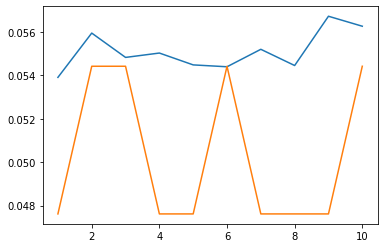

In [131]:
plt.plot(range(1,11),h.history['accuracy'])
plt.plot(range(1,11),h.history['val_accuracy'])

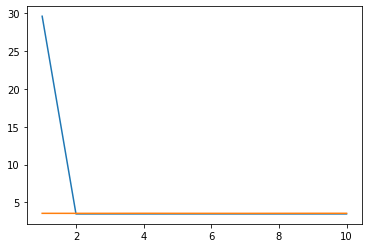

In [132]:
plt.plot(range(1,11),h.history['loss'])
plt.plot(range(1,11),h.history['val_loss'])

In [133]:
score = model1.evaluate(X_test,y_test)
print('LOSS : ',score[0])
print('ACCURACY : ', score[1])

12630/12630 [==============================] - 4s 314us/step
LOSS :  3.46719248130599
ACCURACY :  0.059382423758506775


training accuracy = 0.056, 
validation accuracy = 0.0544
test accuracy = 0.0594

In [0]:
def model2():
  model = Sequential()
  model.add(Conv2D(60,(5,5),activation = 'relu',input_shape = (32,32,1)))
  model.add(Conv2D(60,(5,5),activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation = 'softmax'))
  model.compile(Adam(0.001),metrics = ['accuracy'],loss = 'categorical_crossentropy')
  return model


In [0]:
model2 = model2()

In [136]:
model2.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 30)         

In [137]:
h2 = model2.fit(X_train,y_train,validation_data = [X_val,y_val], batch_size = 400, epochs = 10,shuffle = True,verbose =1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 337s 10ms/step - loss: 2.3911 - accuracy: 0.3556 - val_loss: 0.7240 - val_accuracy: 0.8095
Epoch 2/10
34799/34799 [==============================] - 341s 10ms/step - loss: 0.7271 - accuracy: 0.7752 - val_loss: 0.3620 - val_accuracy: 0.8907
Epoch 3/10
34799/34799 [==============================] - 337s 10ms/step - loss: 0.4340 - accuracy: 0.8617 - val_loss: 0.2224 - val_accuracy: 0.9376
Epoch 4/10
34799/34799 [==============================] - 340s 10ms/step - loss: 0.3132 - accuracy: 0.9038 - val_loss: 0.1756 - val_accuracy: 0.9512
Epoch 5/10
34799/34799 [==============================] - 337s 10ms/step - loss: 0.2474 - accuracy: 0.9216 - val_loss: 0.1483 - val_accuracy: 0.9594
Epoch 6/10
34799/34799 [==============================] - 341s 10ms/step - loss: 0.2040 - accuracy: 0.9346 - val_loss: 0.1226 - val_accuracy: 0.9667
Epoch 7/10
34799/34799 [==============================] -

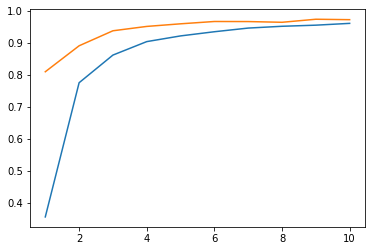

In [138]:
plt.plot(range(1,11),h2.history['accuracy'])
plt.plot(range(1,11),h2.history['val_accuracy'])

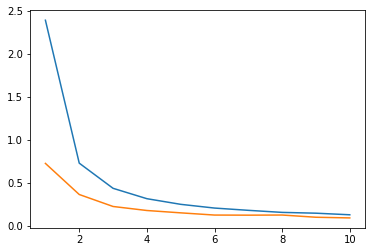

In [139]:
plt.plot(range(1,11),h2.history['loss'])
plt.plot(range(1,11),h2.history['val_loss'])

In [140]:
score = model2.evaluate(X_test,y_test)
print('LOSS : ',score[0])
print('ACCURACY : ', score[1])

12630/12630 [==============================] - 32s 3ms/step
LOSS :  0.16154399200955366
ACCURACY :  0.957640528678894


training accuracy = 0.96, 
validation accuracy = 0.9723
test accuracy = 0.9576

In [0]:
def model3():
  model = Sequential()
  model.add(Conv2D(60,(5,5),activation = 'relu',input_shape = (32,32,1)))
  model.add(Conv2D(60,(5,5),activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation = 'softmax'))
  model.compile(Adam(0.001),metrics = ['accuracy'],loss = 'categorical_crossentropy')
  return model


In [0]:
model3 = model3()

In [143]:
model3.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 480)              

In [144]:
h3 = model3.fit(X_train,y_train,validation_data = [X_val,y_val], batch_size = 200, epochs = 10,shuffle = True,verbose =1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 343s 10ms/step - loss: 1.4560 - accuracy: 0.5990 - val_loss: 0.3110 - val_accuracy: 0.9077
Epoch 2/10
34799/34799 [==============================] - 339s 10ms/step - loss: 0.2510 - accuracy: 0.9216 - val_loss: 0.1672 - val_accuracy: 0.9499
Epoch 3/10
34799/34799 [==============================] - 344s 10ms/step - loss: 0.1334 - accuracy: 0.9593 - val_loss: 0.1414 - val_accuracy: 0.9585
Epoch 4/10
34799/34799 [==============================] - 339s 10ms/step - loss: 0.0882 - accuracy: 0.9738 - val_loss: 0.1402 - val_accuracy: 0.9610
Epoch 5/10
34799/34799 [==============================] - 343s 10ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.1232 - val_accuracy: 0.9664
Epoch 6/10
34799/34799 [==============================] - 343s 10ms/step - loss: 0.0498 - accuracy: 0.9834 - val_loss: 0.0960 - val_accuracy: 0.9735
Epoch 7/10
34799/34799 [==============================] -

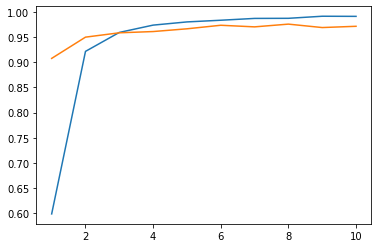

In [146]:
plt.plot(range(1,11),h3.history['accuracy'])
plt.plot(range(1,11),h3.history['val_accuracy'])

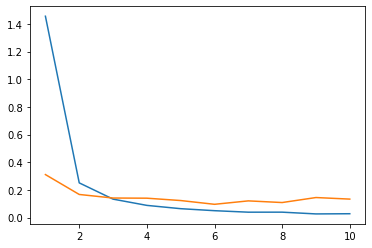

In [149]:
plt.plot(range(1,11),h3.history['loss'])
plt.plot(range(1,11),h3.history['val_loss'])

In [148]:
score = model3.evaluate(X_test,y_test)
print('LOSS : ',score[0])
print('ACCURACY : ', score[1])

12630/12630 [==============================] - 33s 3ms/step
LOSS :  0.2124872154407631
ACCURACY :  0.9520981907844543


training accuracy = 0.9911, 
validation accuracy = 0.9714
test accuracy = 0.952

In [0]:
from PIL import Image
import requests
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

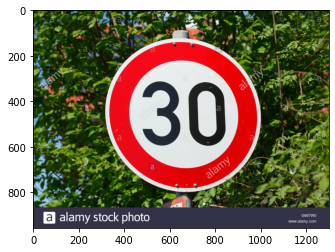

In [155]:
plt.imshow(img)

(956, 1300, 3)
(32, 32)


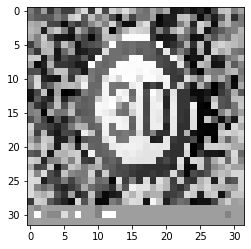

In [158]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [159]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [160]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [1]


In [0]:

url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

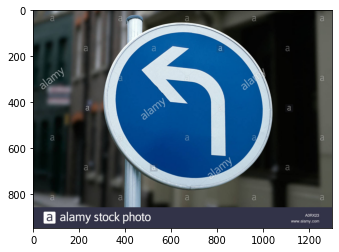

In [162]:
plt.imshow(img)

(946, 1300, 3)
(32, 32)


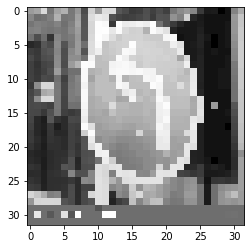

In [163]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [164]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [165]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [12]


In [0]:

url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

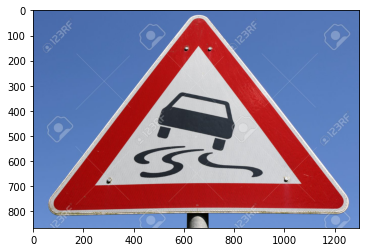

In [167]:
plt.imshow(img)

(866, 1300, 3)
(32, 32)


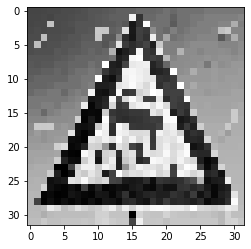

In [168]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [169]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [170]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [23]


In [0]:

url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

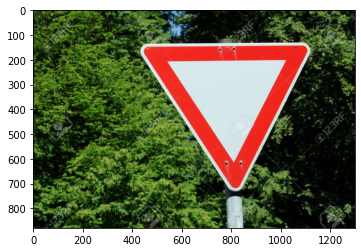

In [172]:
plt.imshow(img)

(879, 1300, 3)
(32, 32)


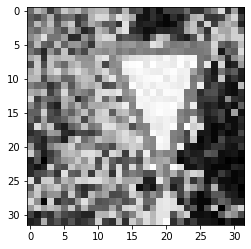

In [173]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [174]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [175]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [12]


In [0]:

url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

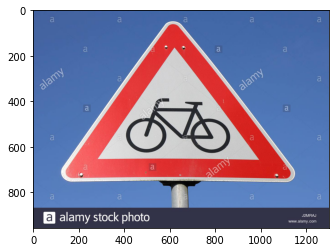

In [177]:
plt.imshow(img)

(956, 1300, 3)
(32, 32)


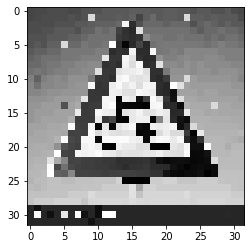

In [178]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [179]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [180]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [11]


In [0]:
## IMAGE DATA GENERATOR

In [0]:
datagenerated = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1,zoom_range = 0.2, rotation_range = 10)
datagenerated.fit(X_train)

In [0]:
batches = datagenerated.flow(X_train,y_train,batch_size = 10)
X_batch, y_batch = next(batches)

(10, 32, 32, 1)
(10, 43)


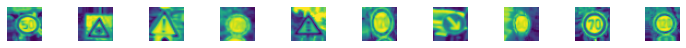

In [250]:
fig , axs = plt.subplots(1,10,figsize = (10,50))
fig.tight_layout()

for i in range(10):
  axs[i].imshow(X_batch[i,:,:].reshape(32,32))
  axs[i].axis('off')

print(X_batch.shape)
print(y_batch.shape)

In [251]:
def final_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),activation = 'relu',input_shape = (32,32,1)))
  model.add(Conv2D(60,(5,5),activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(MaxPool2D((2,2)))

  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation = 'softmax'))
  model.compile(Adam(0.001),metrics = ['accuracy'],loss = 'categorical_crossentropy')
  return model

model4 = final_model()
h4 = model4.fit_generator(datagenerated.flow(X_train,y_train,batch_size = 50 ),steps_per_epoch = 200, epochs = 10, validation_data = [X_val,y_val], verbose = 1, shuffle = 1)

Epoch 1/10
200/200 [==============================] - 110s 549ms/step - loss: 3.0752 - accuracy: 0.1780 - val_loss: 1.5800 - val_accuracy: 0.5345
Epoch 2/10
200/200 [==============================] - 111s 554ms/step - loss: 1.6390 - accuracy: 0.5113 - val_loss: 0.7341 - val_accuracy: 0.8082
Epoch 3/10
200/200 [==============================] - 111s 553ms/step - loss: 1.1024 - accuracy: 0.6645 - val_loss: 0.4326 - val_accuracy: 0.8764
Epoch 4/10
200/200 [==============================] - 110s 550ms/step - loss: 0.7710 - accuracy: 0.7637 - val_loss: 0.2425 - val_accuracy: 0.9272
Epoch 5/10
200/200 [==============================] - 114s 572ms/step - loss: 0.6188 - accuracy: 0.8085 - val_loss: 0.1687 - val_accuracy: 0.9388
Epoch 6/10
200/200 [==============================] - 110s 550ms/step - loss: 0.5345 - accuracy: 0.8397 - val_loss: 0.1472 - val_accuracy: 0.9574
Epoch 7/10
200/200 [==============================] - 110s 549ms/step - loss: 0.4336 - accuracy: 0.8655 - val_loss: 0.1710 -

Text(0.5, 0, 'epoch')

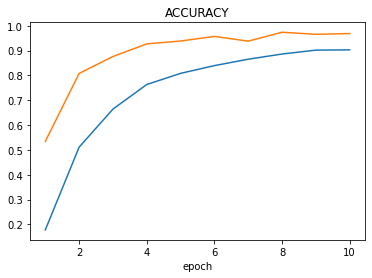

In [252]:
plt.plot(range(1,11),h4.history['accuracy'])
plt.plot(range(1,11), h4.history['val_accuracy'])
plt.title('ACCURACY')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

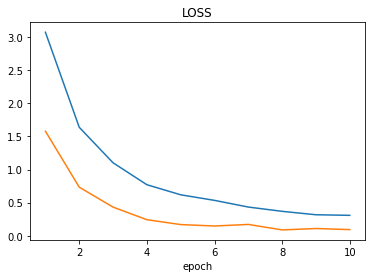

In [253]:
plt.plot(range(1,11),h4.history['loss'])
plt.plot(range(1,11), h4.history['val_loss'])
plt.title('LOSS')
plt.xlabel('epoch')

In [254]:
score = model4.evaluate(X_test,y_test)
print('LOSS : ',score[0] )
print('ACCURACY', score[1])

12630/12630 [==============================] - 33s 3ms/step
LOSS :  0.17181315411439702
ACCURACY 0.9475851058959961


In [0]:

url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

training accuracy = 0.056, 
validation accuracy = 0.0476
test accuracy = 0.052

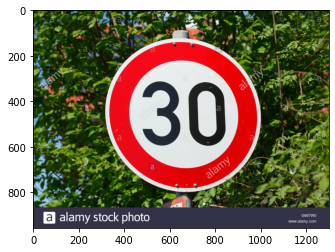

In [256]:
plt.imshow(img)

(956, 1300, 3)
(32, 32)


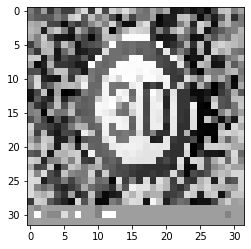

In [257]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [258]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [259]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [1]


In [0]:

url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

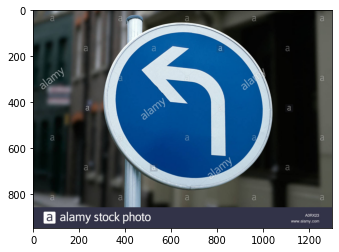

In [261]:
plt.imshow(img)

(946, 1300, 3)
(32, 32)


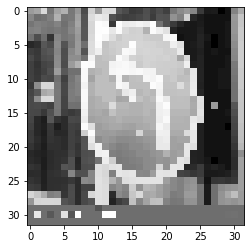

In [262]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [263]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [264]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [12]


In [0]:
import PIL
import requests
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

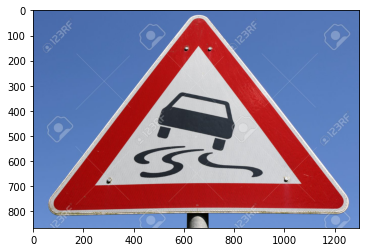

In [266]:
plt.imshow(img)

(866, 1300, 3)
(32, 32)


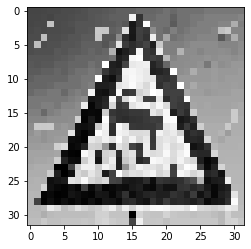

In [267]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [268]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [269]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [23]


In [0]:

url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

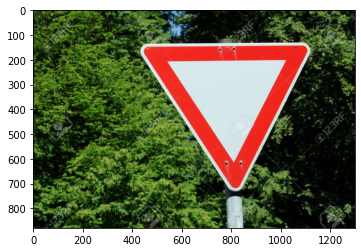

In [271]:
plt.imshow(img)

(879, 1300, 3)
(32, 32)


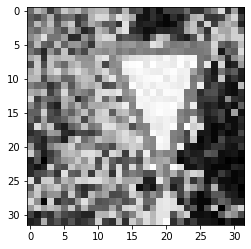

In [272]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [273]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [274]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [12]


In [0]:

url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
response = requests.get(url,stream = True)
img = Image.open(response.raw)

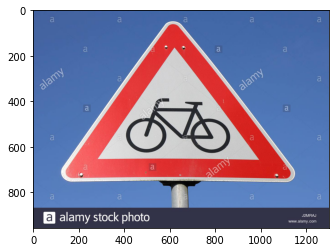

In [276]:
plt.imshow(img)

(956, 1300, 3)
(32, 32)


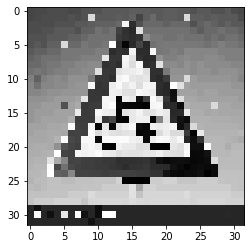

In [277]:
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img,(32,32))
img = preprocess(img)
print(img.shape)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [278]:
img = img.reshape(1,32,32,1)
print(img.shape)

(1, 32, 32, 1)


In [279]:
pred = model3.predict_classes(img)
print('PREDICTION :',pred)

PREDICTION : [11]
